In [1]:
import cv2
import numpy as np

import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage.transform import warp
from skimage.registration import optical_flow_tvl1, optical_flow_ilk
from skimage.io import imread
from skimage.transform import rotate, resize

In [27]:
#Code from https://learnopencv.com/image-alignment-feature-based-using-opencv-c-python/

MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

def alignImages(im1, im2):

    # Convert images to grayscale
    im1Gray = im1
    im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

    # Detect ORB features and compute descriptors.
    orb = cv2.ORB_create(MAX_FEATURES)
    keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
    keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

    # Match features.
    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
    matches = list(matcher.match(descriptors1, descriptors2, None))

    # Sort matches by score
    matches.sort(key=lambda x: x.distance, reverse=False)

    # Remove not so good matches
    numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
    matches = matches[:numGoodMatches]

    # Draw top matches
    imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
    cv2.imwrite("matches.jpg", imMatches)

    # Extract location of good matches
    points1 = np.zeros((len(matches), 2), dtype=np.float32)
    points2 = np.zeros((len(matches), 2), dtype=np.float32)

    for i, match in enumerate(matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    # Find homography
    h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

    # Use homography
    height, width, channels = im2.shape
    im1Reg = cv2.warpPerspective(im1, h, (width, height))
    return im1Reg, im2, h

uint8
uint8
uint8


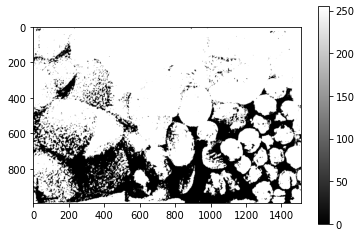

In [65]:
# Open the image files.
imReference = imread('Filters-Round-1/RGB_0.1mm_1a.tif')
film_img = imread('Fruit-Bowl/RGB_0.1mm_1a.jpg')

#process to right size and var type
imReference = (imReference / 255).astype('uint8')
rot_film_img = rotate(film_img, 90, mode='wrap')
crop_film_img = rot_film_img[1580:2575,590:2100,:]
crop_film_img = (crop_film_img * 255).astype('uint8')

#Process the images to be better orb'd
imReference = (imReference>200).astype('uint8')

crop_film_img = cv2.cvtColor(crop_film_img, cv2.COLOR_BGR2GRAY)
crop_film_img = crop_film_img

print(imReference.dtype)
print(film_img.dtype)
print(crop_film_img.dtype)

im = crop_film_img
x, im = cv2.threshold(im,40,255,cv2.THRESH_BINARY)
im = im.astype('uint8')
plt.imshow(im, cmap="gray")
plt.colorbar()

In [55]:
#Align photos
print("Aligning images ...")
# Registered image will be resotred in imReg.
# The estimated homography will be stored in h.
imReg, imFilt, h = alignImages(im, imReference)
# Print estimated homography
print("Estimated homography : \n",  h)

Aligning images ...


error: OpenCV(4.5.5) /io/opencv/modules/core/src/batch_distance.cpp:274: error: (-215:Assertion failed) type == src2.type() && src1.cols == src2.cols && (type == CV_32F || type == CV_8U) in function 'batchDistance'


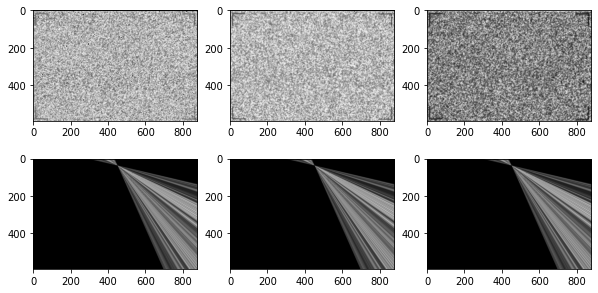

In [110]:
filterR = imFilt[:,:,0]
filterG = imFilt[:,:,1]
filterB = imFilt[:,:,2]

film = imReg

fig, axs = plt.subplots(2,3, figsize=(10, 5))
axs[0,0].imshow(filterR, cmap='gray')
axs[0,1].imshow(filterG, cmap='gray')
axs[0,2].imshow(filterB, cmap='gray')
axs[1,0].imshow(film, cmap='gray')
axs[1,1].imshow(film, cmap='gray')
axs[1,2].imshow(film, cmap='gray')
plt.show()

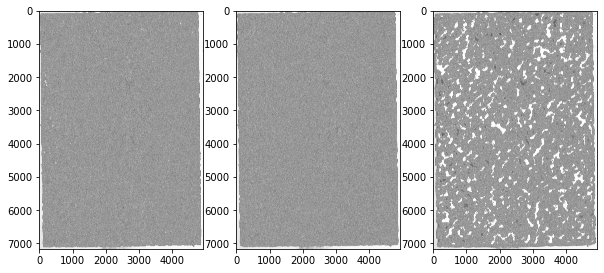

In [32]:
fig, axs = plt.subplots(1,3, figsize=(10, 5))
R = filterR * film
G = filterG * film
B = filterB * film
axs[0].imshow(R, cmap='Greys')
axs[1].imshow(G, cmap='Greys')
axs[2].imshow(B, cmap='Greys')
plt.show()

In [33]:
R_new = np.expand_dims(R, 2)
G_new = np.expand_dims(G, 2)
B_new = np.expand_dims(B, 2)
temp = np.append(R_new, G_new, axis=2)
reconst_img = np.append(temp, B_new, axis=2)

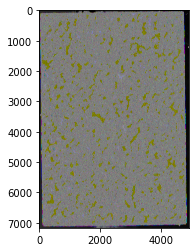

In [34]:
plt.imshow(reconst_img/255)

[[2.55 2.55 2.55 ... 2.55 2.55 2.55]
 [2.55 2.55 2.55 ... 2.55 2.55 2.55]
 [2.55 2.55 2.55 ... 2.55 2.55 2.55]
 ...
 [0.   0.   0.   ... 2.55 2.55 2.55]
 [0.   0.   0.   ... 2.55 2.55 2.55]
 [0.   0.   0.   ... 2.55 2.55 2.55]]
Saving aligned image :  aligned.jpg
Estimated homography : 
 [[ 9.99160201e-01  2.17807879e-02 -1.51452209e+02]
 [-2.08879106e-02  1.00150772e+00 -1.59567046e+01]
 [-1.53673809e-07  2.24598572e-07  1.00000000e+00]]


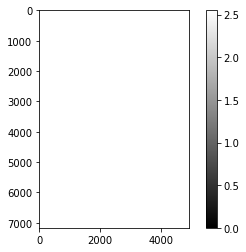

In [25]:
plt.imshow(imColor_Green, cmap="gray")
plt.colorbar()
print(imColor_Green)
# Write aligned image to disk.
outFilename = "aligned.jpg"
print("Saving aligned image : ", outFilename);
cv2.imwrite(outFilename, imColor_Green)